In [1]:
#imorting the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from IPython.display import display
from PIL import Image

import numpy as np
from keras.preprocessing import image

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Initialize the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, 
                             input_shape = (64, 64, 3)))
               
classifier.add(LeakyReLU(alpha=0.1))

#step 2 - pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#step 3 - Flattening
classifier.add(Flatten())

#step 4 - Full Connection
classifier.add(Dense(output_dim = 128))

classifier.add(LeakyReLU(alpha=0.1))

classifier.add(Dense(output_dim = 12, 
                     activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

#Fitting the CNN to the images
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = False)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

W0720 23:45:11.241252 19320 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3...)`
  
W0720 23:45:11.373404 19320 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 23:45:11.375450 19320 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 23:45:11.388417 19320 deprecation_wrapper.py:119] 

In [3]:
training_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset12/train_set12',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

test_set = train_datagen.flow_from_directory(
        'C:/Users/ASUS/Desktop/Research/Image Dataset/Dataset12/test_set12',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'categorical')

Found 4327 images belonging to 12 classes.
Found 1860 images belonging to 12 classes.


In [4]:
#Training the network

history = classifier.fit_generator(
        training_set,
        steps_per_epoch = 100,
        epochs = 10,
        validation_data = test_set,
        validation_steps = 10)

W0720 23:45:16.117732 19320 deprecation.py:323] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0720 23:45:16.160618 19320 deprecation_wrapper.py:119] From C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
100/100 [==============================] - 209s 2s/step - loss: 1.6144 - acc: 0.5456 - val_loss: 0.6525 - val_acc: 0.8250
Epoch 2/10
100/100 [==============================] - 150s 1s/step - loss: 0.3852 - acc: 0.8875 - val_loss: 0.2647 - val_acc: 0.9437
Epoch 3/10
100/100 [==============================] - 124s 1s/step - loss: 0.1511 - acc: 0.9667 - val_loss: 0.1502 - val_acc: 0.9656
Epoch 4/10
100/100 [==============================] - 126s 1s/step - loss: 0.0651 - acc: 0.9891 - val_loss: 0.0599 - val_acc: 0.9906
Epoch 5/10
100/100 [==============================] - 126s 1s/step - loss: 0.0338 - acc: 0.9950 - val_loss: 0.0607 - val_acc: 0.9875
Epoch 6/10
100/100 [==============================] - 130s 1s/step - loss: 0.0154 - acc: 0.9987 - val_loss: 0.1036 - val_acc: 0.9829
Epoch 7/10
100/100 [==============================] - 133s 1s/step - loss: 0.0117 - acc: 0.9994 - val_loss: 0.0426 - val_acc: 0.9938
Epoch 8/10
100/100 [==============================] - 128s 1s/step - 

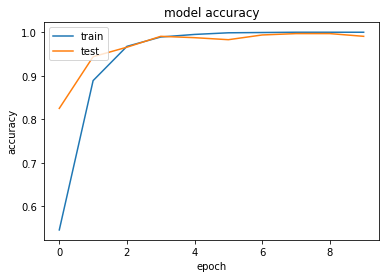

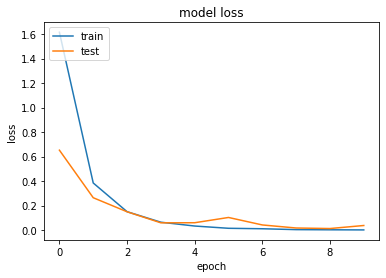

In [5]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
# save model and architecture to single file
classifier.save("model.hNew12")
print("Saved model to disk")

Saved model to disk


In [3]:
# load and evaluate a saved model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from numpy import loadtxt
from keras.models import load_model
from keras.preprocessing import image

from IPython.display import display
from PIL import Image

import numpy as np
from scipy.misc import imresize
import matplotlib.pyplot as plt

# load model
classifier = load_model('model.hNew12')

[1]


C:\Users\ASUS\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


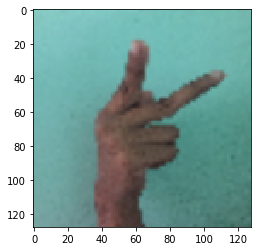

In [25]:
test_image = load_img('C:/Users/ASUS/Desktop/Research/Image Dataset/10/IMG_4774.jpg', target_size = (64, 64))

test_image = test_image.rotate(-90)

displayImage = imresize(test_image, [128,128])

plt.imshow(displayImage)

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict_classes(test_image)

print(result)

#training_set.class_indices

In [26]:
if result == 0:
    prediction = 'Sign 1'
elif result == 1:
    prediction = 'Sign 10'
elif result == 2:
    prediction = 'Sign 11'
elif result == 3:
    prediction = 'Sign 12'
elif result == 4:
    prediction = 'Sign 2'
elif result == 5:
     prediction = 'Sign 3'
elif result == 6:
     prediction = 'Sign 4'
elif result == 7:
     prediction = 'Sign 5'
elif result == 8:
     prediction = 'Sign 6'
elif result == 9:
     prediction = 'Sign 7'
elif result == 10:
     prediction = 'Sign 8'
elif result == 11:
     prediction = 'Sign 9'

print(prediction)

Sign 10
